# Workflow for genomic data visualization using [PyGenomeTrack](https://github.com/deeptools/pyGenomeTracks)
# Part 2: Demo of Genome Visualization based of prepared data

***
>This notebook contains a procedure to prepare the sequencing data and to create the region plots. 
The workflow describes the tools to convert the files into the formats: BED6, BED12, BAM, and BIGWIG. Additionally, we formed the helper functions to create .ini files from scratch.

> The [PyGenomeTrack](https://github.com/deeptools/pyGenomeTracks) aims to produce high-quality genome browser tracks.

> The main steps of PART 2:
    0. Installation of requirements.
    1. PyGenomeTracks - make tracks file.
    2. PyGenomeTracks - make region plot

> __HINT:__ Exclamation mark (!) at the beginning of line allows to use bash commands from the jupyter notebook.
***

***
### Types of file formats used in this Notebook:
* [BED6/BED12](https://genome.ucsc.edu/FAQ/FAQformat.html#format1) - Browser Extensible Data
* The [BIGWIG](https://genome.ucsc.edu/goldenPath/help/bigWig.html) format is useful for dense, continuous data that will be displayed in the Genome Browser as a graph.
* The __INI__ file format is an informal standard for configuration files.

### Example files to visualize Genome track:
* file_bed6_sorted.bed
* bigwig_bed6.bw
* ini_file_BED6.ini
* bigwig_reverse.bw
* bigwig_forward.bw
* ini_file_BED6_podwojny_bw.ini
* file_bed12_sorted.bed
* ini_file_BED12.ini
* ini_file_BED12_2bw.ini
***

## 0. Installation of requirements

### A) Installation from file 'requirements.txt' using "pip install"
> __HINT:__ We recommend to install the requirements in a virtual environment to avoid inconsistencies in the local environment.

In [ ]:
!pip install -r requirements.txt 

### B)  Install PyGenomeTrack according to https://github.com/deeptools/pyGenomeTracks , for example using pip install

In [ ]:
# Installation of PyGenomeTrack with pip install
!pip install pygenometracks 

***
## 1. PyGenomeTracks - make tracks file
> Making tracks file is necessary to create the plot.

> __HINT:__ Make sure to take the right .bed, .bw, and .ini files.
If you change the name of BED file, you need to rewrite it in the .ini file.
***

### A) PyGenomeTrack using BED6:
> __HINT: If necessary, save your INI file after this step.__

#### PyGenomeTrack using BED6 and one BigWig file - made from BAM file containing both strains (plus and minus):

In [5]:
# PyGenomeTrack using BED6 and one BigWig file - made from BAM file containing both strains (plus and minus) 
!make_tracks_file --trackFiles file_bed6_sorted.bed bigwig_bed6.bw -o ini_file_BED6.ini

Adding bed file: file_bed6_sorted.bed
Adding bigwig file: bigwig_bed6.bw


#### PyGenomeTrack using BED6 and two BigWig files - made from BAM files containing only one strain (plus or minus)

In [6]:
# PyGenomeTrack using BED6 and two BigWig files - made from BAM files containing only one strain (plus or minus) 
!make_tracks_file --trackFiles file_bed6_sorted.bed bigwig_reverse.bw bigwig_forward.bw -o ini_file_BED6_podwojny_bw.ini

Adding bed file: file_bed6_sorted.bed
Adding bigwig file: bigwig_reverse.bw
Adding bigwig file: bigwig_forward.bw


### B) PyGenomeTrack using BED12:

#### PyGenomeTrack using BED12 and one BigWig file - made from BAM file containing both strains (plus and minus) 

In [7]:
# PyGenomeTrack using BED12 and one BigWig file - made from BAM file containing both strains (plus and minus) 
!make_tracks_file --trackFiles file_bed12_sorted.bed bigwig_bed6.bw -o ini_file_BED12.ini

Adding bed file: file_bed12_sorted.bed
Adding bigwig file: bigwig_bed6.bw


#### PyGenomeTrack using BED12 and two BigWig files - made from BAM files containing only one strain (plus or minus)

In [17]:
# PyGenomeTrack using BED12 and two BigWig files - made from BAM files containing only one strain (plus or minus)
!make_tracks_file --trackFiles file_bed12_sorted.bed bigwig_reverse.bw bigwig_forward.bw -o ini_file_BED12_2bw.ini

Adding bed file: file_bed12_sorted.bed
Adding bigwig file: bigwig_reverse.bw
Adding bigwig file: bigwig_forward.bw


***
## 2. PyGenomeTracks - make region plot

> ##### Create region plot and save it as .png or .pdf
    !pyGenomeTracks --tracks <ini_file.ini> --region I:1,800,000-1,820,000 --outFileName <png_file.png>
    !pyGenomeTracks --tracks <ini_file.ini> --region I:1,800,000-1,820,000 --outFileName <pdf_file.pdf>
***

### A) The example region plot using BED6 format:
> If you want to have different colors for genes, UTRs, etc., mark it in column 5 in the bed6 file.
> To prepare plot with two BigWig files (for + and - strains), please add section od second BigWig in your INI file, like in th example.

In [11]:
# Create the region plot
!pyGenomeTracks --tracks ini_file_BED6_podwojny_bw.ini --region I:250,000-275,000 --outFileName bed6_twoBigWig_6.png
# !pyGenomeTracks --tracks ini_file_BED6.ini --region I:1,000,000-1,050,000 --outFileName bed6_1.pdf

INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.444417953491211
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 11.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [file_bed6_sorted]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 2859.9999999999995,0
INFO:pygenometracks.tracksClass:plotting 4. [bigwig_forward]
INFO:pygenometracks.tracksClass:plotting 5. [bigwig_reverse]


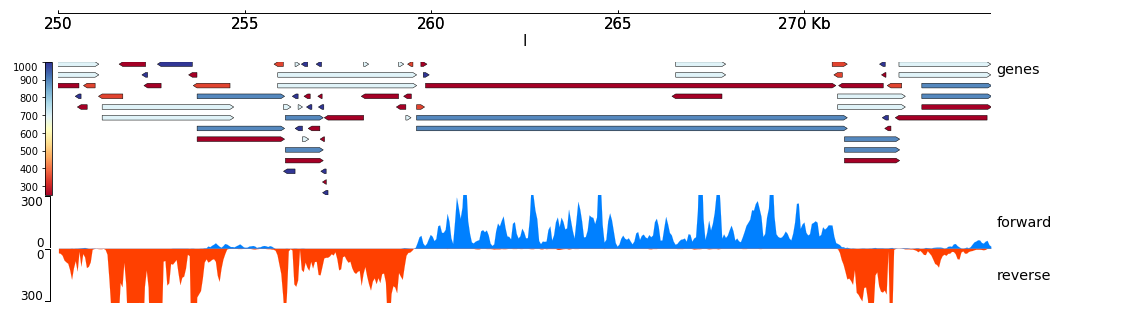

In [12]:
# Look at the new plot
from IPython.display import Image

#The name of the new file (.png) with plot showing genomic location
#
# Just copy the name of new .png file

png_bed6 = "bed6_twoBigWig_6.png"
Image(png_bed6)

### B) The example region plot using BED12 format:

In [20]:
# Create the region plot
!pyGenomeTracks --tracks ini_file_BED12_2bw.ini --region I:250,000-275,000 --outFileName bed12_2bw_9.png
# !pyGenomeTracks --tracks ini_file_BED12.ini --region I:1,000,000-1,050,000 --outFileName bed12_3.pdf

INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.5049691200256348
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 11.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
/home/lidia/anaconda3/envs/dm4/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [file_bed12_sorted]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 789.9999999999999,0
INFO:pygenometracks.tracksClass:plotting 4. [bigwig_forward]
INFO:pygenometracks.tracksClass:plotting 5. [bigwig_reverse]


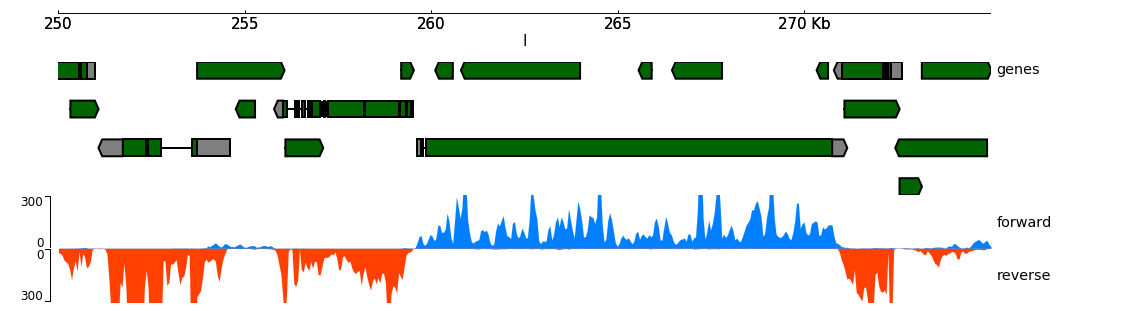

In [21]:
# Look at the new plot
from IPython.display import Image

#The name of the new file (.png) with plot showing genomic location
#
# Just copy the name of new .png file

png_file_name_bed12 = "bed12_2bw_9.png"
Image(png_file_name_bed12)

***
#### ~ The End ~
***